# Matplotlib Cookbook

This notebook is intended to provide a reference for using matplotlib.  It contains a collection of recipes for creating matplotlib plots.

## Introduction to matplotlib

matplotlib is a 2D plotting library which produces figures that can be heavily customized. With this library we can generate plots such as line graphs, histograms, power spectra, bar charts, errorcharts, and scatterplots with few lines of code.  This notebook will show you how to create these plots and customize them to your needs. 

<div class="alert alert-block alert-info" style="margin-top: 20px">**Note:** This notebook uses some examples that are derived from external sources, including those found at [matplotlib.org](http://www.matplotlib.org) and Lecture 4 in [Lectures on scientific computing with Python](https://github.com/jrjohansson/scientific-python-lectures/blob/master/README.md).</div>

In [1]:
# <help>

##Import matplotlib
Import the matplotlib pyplot module and tell the notebook to display plots inline.

In [2]:
# <help:matplotlib_setup>
import matplotlib.pyplot as plt
%matplotlib inline

## matplotlib.pyplot
Each pyplot function makes some changes to a figure: 
* Create a figure
* Create a plotting area in a figure
* Plot some lines in a plotting area
* Decorate the plot with labels, etc.

`matplotlib.pyplot` is stateful. It keeps track of the current figure and plotting area, and the plotting functions are directed to the current axes. As in all notebooks imports, configurations and variables only need to be declared once at the top of the notebook. Howevea, to enable standalone execution, each recipe in this cookbook contains all required imports and variable declarations.

## Simple Line Chart
Create a line chart by plotting numbers 0-10.

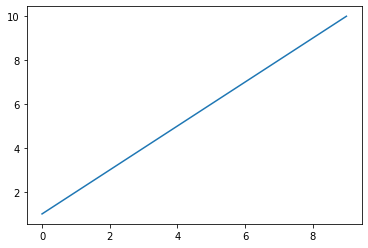

In [3]:
# <help:simple_plot>

import matplotlib.pyplot as plt
%matplotlib inline

mylist = range(1,11)
plt.plot(mylist)
plt.show()

If you pass an iterable to the `plot()` function, matplotlib assumes they are y values and generates the x values for you.

## Label a Line Chart

Draw a line chart, with custom axes labels and title.

Text(0, 0.5, 'The y axis')

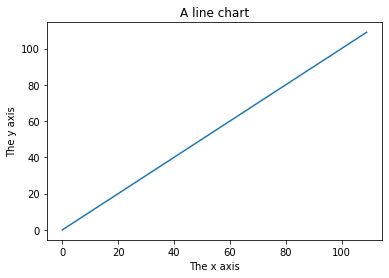

In [4]:
# <help:label_line_chart_recipe>

import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()

plt.plot(range(110), range(110))
ax.set_title('A line chart')
ax.set_xlabel('The x axis') 
ax.set_ylabel('The y axis')

## NumPy Arrays  
matplotlib converts all sequences to NumPy arrays. [NumPy](http://www.numpy.org/) is a Python library which adds more power to numerical operations.   With NumPy you can use trigonometry, complex numbers, and much more.

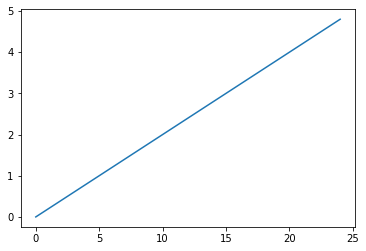

In [5]:
# <help:numpy_array>
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()

# evenly sample time at 200ms intervals
t = np.arange(0., 5., 0.2)

plt.plot(t)
plt.show()

## Plot Multiple Ranges  
This example shows how to plot several ranges on the same plot, each with different styles.

The default color that matplotlib uses is blue, but colors are customizable.  For example, you can change the colors using the [MathWorks ColorSpec](http://www.mathworks.com/help/matlab/ref/colorspec.html), which is supported in matplotlib.   To specify a color to be used to display a range of values, specify either the short name or long name of the color, as listed below.

```
RGB Value Short Name Long Name
[1 1 0]   y          yellow
[1 0 1]   m          magenta
[0 1 1]   c          cyan
[1 0 0]   r          red
[0 1 0]   g          green
[0 0 1]   b          blue
[1 1 1]   w          white
[0 0 0]   k          black
```

Lines are solid by default.  To plot using different shapes, such as dashes, squares, triangles etc., we need the [LineSpec property](http://www.mathworks.com/help/matlab/ref/linespec.html).

<div class="alert alert-block alert-info" style="margin-top: 20px">Note: To use the LineSpec property on a range, you must use the short name of a color when choosing a custom color.</div>

In [6]:
# <help:color>
# You can use the following colors to plot, color='r' for example.
# RGB Value Short Name Long Name
# [1 1 0]   y          yellow
# [1 0 1]   m          magenta
# [0 1 1]   c          cyan
# [1 0 0]   r          red
# [0 1 0]   g          green
# [0 0 1]   b          blue
# [1 1 1]   w          white
# [0 0 0]   k          black
# More info at:
# [MathWorks ColorSpec](http://www.mathworks.com/help/matlab/ref/colorspec.html)

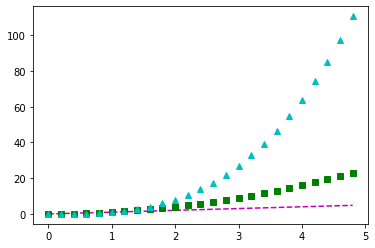

In [7]:
# <help:plot_multiple_ranges>

import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()

import numpy as np

# evenly sample time at 200ms intervals
t = np.arange(0., 5., 0.2)

# magenta dashes (--) for t, 
# green squares (s) for t^2
# cyan triangles (^) for t^3
plt.plot(t, t, 'm--', t, t**2, 'gs', t, t**3, 'c^')
plt.show()

## Control Line Properties
There are many ways to control line properties:

```
plt.plot(x, y, linewidth=2.0) #keyword args

line, = plt.plot(x, y, 'v') #downward-ponting triangle

line.set_antialiased(False) # turn off antialiasing

lines = plt.plot(x1, y1, x2, y2) # use keyword args

plt.setp(lines, color='r', linewidth=2.0) # or MATLAB style string value pairs

plt.setp(lines, 'color', 'r', 'linewidth', 2.0)
```

## Legends, labels and titles

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

```
ax.set_title("title")
```

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

```
ax.set_xlabel("x")
ax.set_ylabel("y")
```

The following figure shows how to use the figure title, axis labels and legends described above:

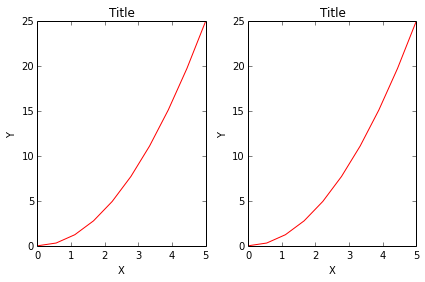

In [7]:
# <help:axes_titles_example>

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x = np.linspace(0, 5, 10)
y = x ** 2
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Title')
    
fig.tight_layout()

**Legends**

Legends for curves in a figure can be added in two ways. One method is to use the `legend` method of the axis object and pass a list/tuple of legend texts for the previously defined curves:

```
ax.legend(["curve1", "curve2", "curve3"])
```

The method described above follows the MATLAB API. It is somewhat prone to errors and unflexible if curves are added to or removed from the figure (resulting in a wrongly labelled curve).

A better method is to use the `label="label text"` keyword argument when plots or other objects are added to the figure, and then using the `legend` method without arguments to add the legend to the figure: 

```
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend()
```

The advantage of this method is that if curves are added or removed from the figure, the legend is automatically updated accordingly.

The `legend` function takes an optional keyword argument `loc` that can be used to specify where in the figure the legend is to be drawn. The allowed values of `loc` are numerical codes for the various places the legend can be drawn. See http://matplotlib.org/users/legend_guide.html#legend-location for details. 

Some of the most common `loc` values are:

```
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available
```

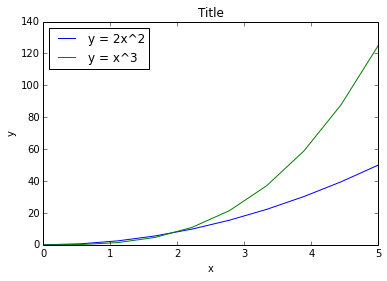

In [8]:
# <help:simple_plot_with_title_axis_legend>

import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()

import numpy as np

x = np.linspace(0, 5, 10)

ax.plot(x, 2*x**2, label="y = 2x^2")
ax.plot(x, x**3, label="y = x^3")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Title');

##Multiple Plots

Use `subplot()` to support multiple plots in the same figure.  The `subplot()` function parameter specifies `nrows`, `ncols`, and `plot_num`, where `plot_num` is a range from 1 to `nrows*ncols`.   For example, in a figure that has 2 rows and 1 column, `subplot(211)` refers to the first plot, and `subplot(212)` refers to the **second** plot.

Note: The commas in the subplot command are optional if `(nrows*ncols)<10`.  So `subplot(211)` is identical to `subplot(2,1,1)`. 

You can create an arbitrary number of subplots and axes. If you want to place axes manually, i.e., not on a rectangular grid, use the `axes()` function, which allows you to specify the location as `axes([left, bottom, width, height])`, where all values are in fractional (0 to 1) coordinates.

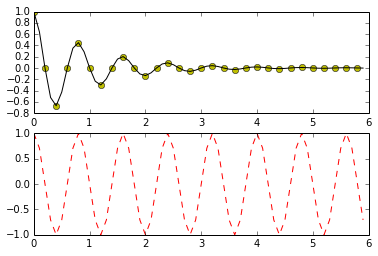

In [9]:
# <help:multiple_plots>

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# define a function to plot, needs numpy
def f(t): 
    return np.exp(-t) * np.cos(2.5*np.pi*t)

t1 = np.arange(0.0, 6.0, 0.2)
t2 = np.arange(0.0, 6.0, 0.1)

# '1' parameter is optional, specifying no parameter will
# also create a single plot
plt.figure(1) 
plt.subplot(211)
plt.plot(t1, f(t1), 'yo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2.5*np.pi*t2), 'r--')
plt.show()

##Multiple Figures
You can create multiple figures by using multiple `figure()` calls with an increasing figure number. Each figure can contain as many axes and subplots as you like:

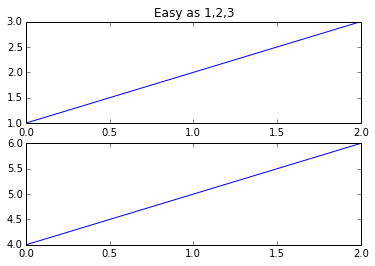

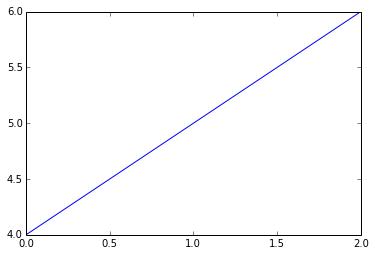

In [10]:
# <help:multiple_figures>

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1,2,3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4,5,6])

plt.figure(2)                # a second figure
plt.plot([4,5,6])            # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1,2,3')   # subplot 211 title

##Formatting text: LaTeX, fontsize, font family
The figure above is functional, but it does not (yet) satisfy the criteria for a figure used in a publication. First and foremost, we need to have LaTeX formatted text, and second, we need to be able to adjust the font size to appear correctly in a publication.

matplotlib has great support for LaTeX. All we need to do is to use dollar signs to encapsulate LaTeX in any text (legend, title, label, etc.). For example, `"$y=x^3$"`.

But here we can run into a slightly subtle problem with LaTeX code and Python text strings. In LaTeX, we frequently use the backslash in commands, for example `\alpha` to produce the symbol $\alpha$. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up our latex code, we need to use "raw" text strings. Raw text strings are prepended with an '`r`', like `r"\alpha"` or `r'\alpha'` instead of `"\alpha"` or `'\alpha'`:

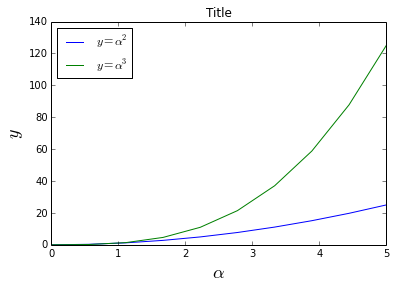

In [11]:
# <help:legend_latex_font>

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
fig, ax = plt.subplots()
x = np.linspace(0, 5, 10)
ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('Title');

##Modify rcParams
We can also change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels and titles, legends, etc.).

```
import matplotlib as matplotlib
matplotlib.rcParams.update({
    'font.size': 12, 
    'font.family': 'serif'
})
```

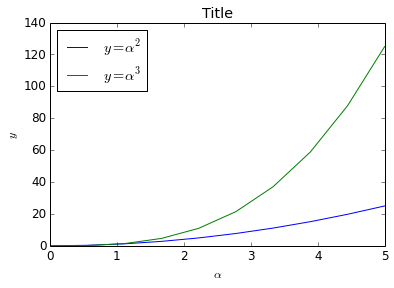

In [12]:
# <help:rcParams>
# Update the matplotlib configuration parameters:
import matplotlib as matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
fig, ax = plt.subplots()
x = np.linspace(0, 5, 10)
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'serif'})

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('Title');

##rcParams using STIX
A good choice of global fonts are the STIX fonts:

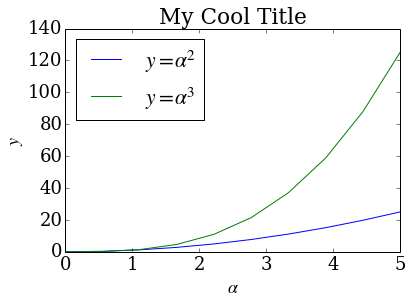

In [13]:
# <help:rcParams_STIX>
# Update the matplotlib configuration parameters:
import matplotlib as matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
fig, ax = plt.subplots()
x = np.linspace(0, 5, 10)
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('My Cool Title');

##rcParams Restore Defaults
To restore the `rcParams` settings to their defaults:

In [14]:
# <help:rcParams_restore_defaults>
# restore matplotlib configuration
import matplotlib as matplotlib
matplotlib.rcParams.update({'font.size': 12, 
                            'font.family': 'sans', 
                            'text.usetex': False})

##Axes Limits
This example shows how to set axes limits.

To configure the ranges of the axes, use the `set_ylim` and `set_xlim` methods of the axis object, or use `axis('tight')` to automatically display "tightly fitted" axes ranges.

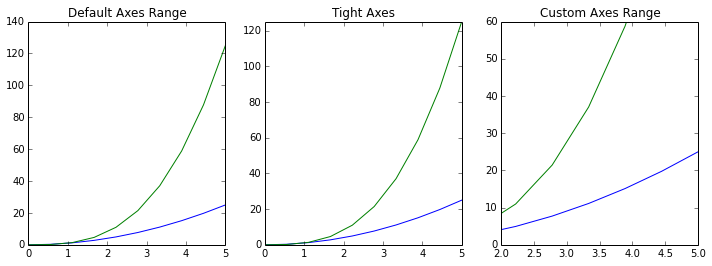

In [15]:
# <help:axes_limits>
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
x = np.linspace(0, 5, 10)
axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("Default Axes Range")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("Tight Axes")

axes[2].plot(x, np.power(x,2), x, np.power(x,3))
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("Custom Axes Range");

##Axes Limits with Scientific Notation
With large numbers on an axis, it is often better to use scientific notation.

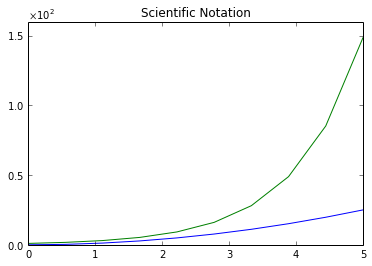

In [16]:
# <help:axes_limit_scientific>
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 5, 10)
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("Scientific Notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True) #scientific notation
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter)

##Scatter Plot
Use the `scatter()` function to create a scatterplot.

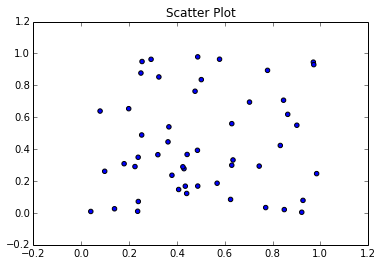

In [4]:
# <help:scatter_plot>
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

N= 50 
x = np.random.rand(N)  #generate 50 random numbers
y = np.random.rand(N)

plt.scatter(x, y)
plt.title("Scatter Plot")
plt.show()

##Step Plot
Use the `step()` function to create a step plot.

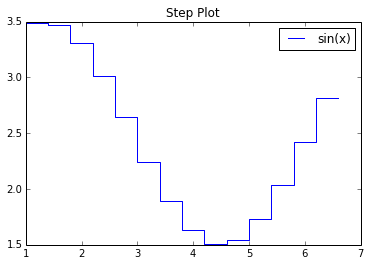

In [18]:
# <help:step_plot>
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x = np.arange(1, 7, 0.4)
y0 = np.sin(x)
y = y0.copy() + 2.5

plt.step(x, y, label='sin(x)')
plt.legend()
plt.title("Step Plot")
plt.show()


##Bar Graph
Use the `bar()` function to specify a vertical bar chart.

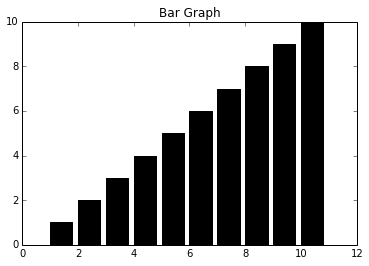

In [19]:
# <help:vertical_bar>
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure()

x = range(1,11)
y = range(1,11)
plt.bar(x, y, color= 'k')
plt.title("Bar Graph")

plt.show()

##Horizontal Bar Graph
Use the `barh()` function to plot horizontal bar graphs.

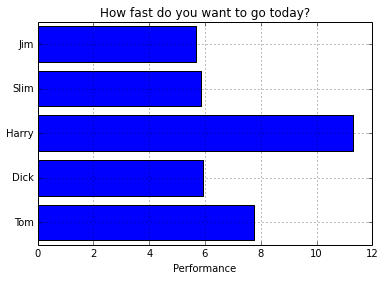

In [20]:
# <help:horizontal_bar>
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

val = 3+10*np.random.rand(5)    # the bar lengths
pos = np.arange(5)+.5    # the bar centers on the y axis

plt.figure(1)
# plot a horizontal bar graph centrally aligned
plt.barh(pos,val, align='center')
# assign names to the y axis, the variables
plt.yticks(pos, ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')) 
plt.xlabel('Performance') 
plt.title('How fast do you want to go today?')
# add a grid to the background
plt.grid(True)  

plt.show()

##Stacked Bar Chart
To create a stacked bar graph, specify the argument bottom in the `bar()` function.  The bottom data represents the bottom coordinate of each data range. 

This example shows the data for men plotted below the data for women.

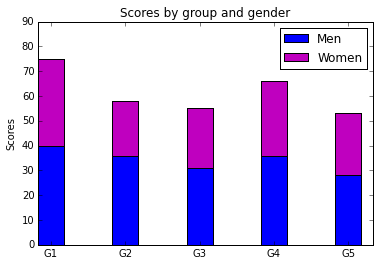

In [6]:
# <help:stacked_bar_chart>
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

N = 5
menMeans   = (40, 36, 31, 36, 28)
womenMeans = (35, 22, 24, 30, 25)
menStd     = (2, 3, 4, 1, 2)
womenStd   = (3, 5, 2, 3, 3)
ind = np.arange(N)  # the x locations for the groups
width = 0.35        # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans,   width, color='b')
p2 = plt.bar(ind, womenMeans, width, color='m',
             bottom=menMeans) # specify as going to the bottom

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind+width/2., ('G1', 'G2', 'G3', 'G4', 'G5') )
plt.yticks(np.arange(0,91,10))
plt.legend( (p1[0], p2[0]), ('Men', 'Women') )

plt.show()

This example shows the data for women plotted below the data for men.

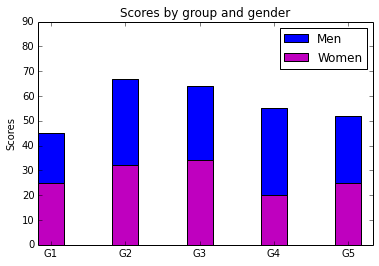

In [22]:
# <help:stacked_bar_chart>
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

N = 5
menMeans   = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd     = (2, 3, 4, 1, 2)
womenStd   = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35          # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans,   width, color='b', bottom= womenMeans)
p2 = plt.bar(ind, womenMeans, width, color='m') # specify as going to the bottom

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind+width/2., ('G1', 'G2', 'G3', 'G4', 'G5') )
plt.yticks(np.arange(0,91,10))
plt.legend( (p1[0], p2[0]), ('Men', 'Women') )

plt.show()

##Adding an error margin in a graph
Use the `errorbar()` function and its `xerr` and/or `yerr` parameters to specify error margins.  This will show a `|----|` to indicate a margin of error above and below the y values.

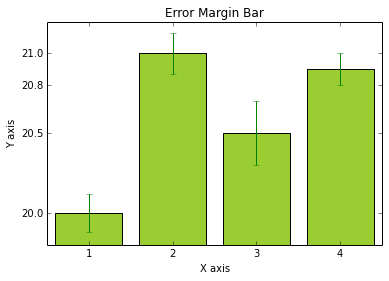

In [23]:
# <help:error_margin>
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x = [1, 2, 3, 4]
y = [20, 21 , 20.5, 20.9]

#define how much the error
y_error = [.12, .13, .2, .1]

#plot data
plt.bar(x,y, color="yellowgreen", align='center')
plt.errorbar(x,y, yerr=y_error, linestyle="None", 
             marker="None", color="green")

#configure  X axis
plt.xlim(0.5, 4.5)
plt.xticks([1,2,3,4])
#configure Y axis
plt.ylim(19.8,21.2)
plt.yticks([20,21,20.5,20.8])

#title and labels
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Error Margin Bar")

#show plot
plt.show()

This example shows error margins with a regular line plot

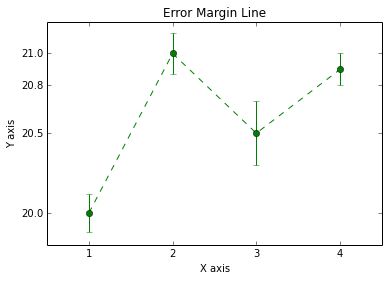

In [24]:
# <help:error_margin>
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x = [1, 2, 3, 4]
y = [20, 21 , 20.5, 20.9]

#errors
y_error = [.12, .13, .2, .1]

#plot data
plt.plot(x,y, linestyle="dashed", marker="o", color="green")
plt.errorbar(x,y, yerr=y_error, linestyle="None", 
             marker="None", color="green")

#configure  X axis
plt.xlim(0.5, 4.5)
plt.xticks([1,2,3,4])
#configure Y axis
plt.ylim(19.8,21.2)
plt.yticks([20,21,20.5,20.8])

#title and labels
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Error Margin Line")
#show plot
plt.show()

##Fill Between
The `fill_between()` function generates a shaded region between a min and max boundary that is useful for illustrating ranges. It has a very handy `where` parameter that permits filling with logical ranges, e.g., to fill in a curve over some threshold value.

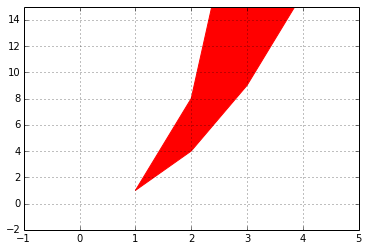

In [25]:
# <help:fill_between>
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.fill_between(x, np.power(x,2), np.power(x,3), color="red")
plt.ylim(-2,15)
plt.xlim(-1,5)
plt.grid(True)
plt.show()

`fill_between()` can be used with subplots too.

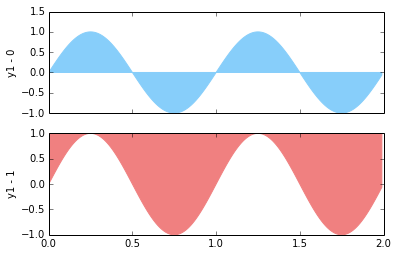

In [26]:
# <help:fill_between>
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2*np.pi*x)

width = 0.35

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

ax1.fill_between(x, 0, y1, color="lightskyblue")
ax1.set_ylabel('y1 - 0')

ax2.fill_between(x, y1, 1, color="lightcoral")
ax2.set_ylabel('y1 - 1')

plt.show()

##Histogram
A histogram is often used to display probability data.  Use the `hist()` function to create a histogram. The `bins` parameter specifies the number of bars to be displayed.  Setting `cumulative=True` will make the histogram a cumulative histogram, where all values sum to 100%.

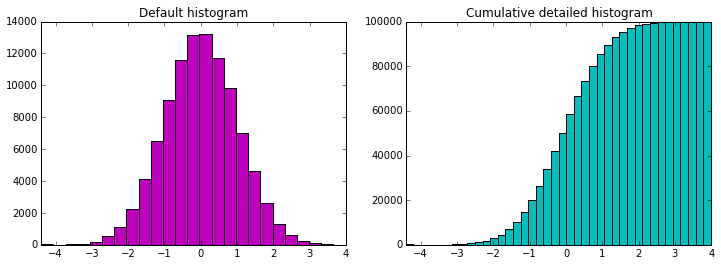

In [9]:
# <help:histogram>
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n, bins=25, color = 'm')
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=40, color='c')
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

##Pie Chart
Use the `pie()` function to create a pie chart.  By default, this function chooses its own colors, and does not display legends nor label names.   To set colors, legends, labels, and start angle, pass them into the `pie()` function as parameters. 

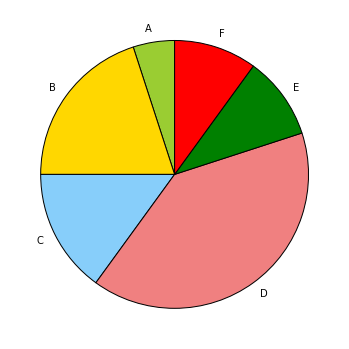

In [28]:
# <help: pie_chart>
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data = [5,20,15,40,10,10]  #info
labels = ['A','B','C','D','E','F'] # labels
plt.figure(1, figsize=(6,6))  # make it square
colors = ['yellowgreen', 'gold', 'lightskyblue', 
          'lightcoral', 'green', 'red']
plt.pie(data, labels=labels, colors= colors, startangle=90)

plt.show()

Here is an example that shows an exploded view, with shadow effect, and a title.

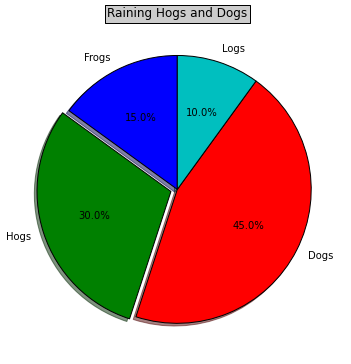

In [29]:
# <help: pie_chart>
# make a square figure and axes
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.figure(1, figsize=(6,6))

# The slices will be ordered and plotted counter-clockwise.
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]
explode=(0, 0.05, 0, 0)

plt.pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)
                # The default startangle is 0, which would start
                # the Frogs slice on the x-axis.  With startangle=90,
                # everything is rotated counter-clockwise by 90 degrees,
                # so the plotting starts on the positive y-axis.

plt.title('Raining Hogs and Dogs', bbox={'facecolor':'0.8', 'pad':5})

plt.show()

#Polar Plots
In this section, we will review Polar line, bar, and scatter plots.

Use `Polar=True` for plotting polar coordinates

##Polar Line Plot

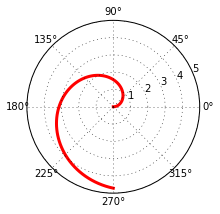

In [30]:
# <help:polar_line_plot # using add_axes and polar projection>
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 1.5 * np.pi, 100)
ax.plot(t, t, color='red', lw=3);

##Polar Bar Plot

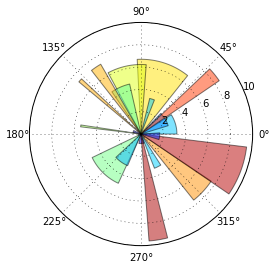

In [31]:
# <help: polar_bar_plot>
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

N = 21
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

ax = plt.subplot(111, polar=True) #polar=True for polar plot
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.5)

plt.show()

##Polar Scatter Plot

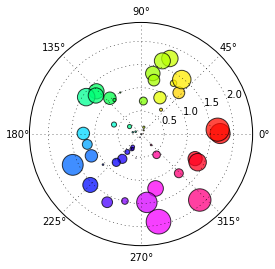

In [32]:
# <help: polar_scatterplot>
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

N = 50
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2 * np.random.rand(N)
colors = theta

ax = plt.subplot(111, polar=True)
c = plt.scatter(theta, r, c=colors, s=area, cmap=plt.cm.hsv)
c.set_alpha(0.75)

plt.show()

#3D figures
To use 3D graphics in matplotlib, create an instance of the `Axes3D` class. 3D axes can be added to a matplotlib figure canvas in exactly the same way as 2D axes; or, more conveniently, by passing a `projection='3d'` keyword argument to the `add_axes` or `add_subplot` methods.

```
#<help:import_3D_library>
from mpl_toolkits.mplot3d.axes3d import Axes3D
```

##Surface Plots
To create a 3D projection, add the argument `projection='3d'` to a `add_subplot()` or `plot()` function call.  Create a surface by calling the `plot_surface()` function.  Customize the stride (space in between each contour line extension), linewidth of that line, and many more using the appropriate function parameters.

By default, a surface will be colored in shades of a solid color, but it also supports color mapping by supplying the `cmap` argument. Some arguments are `coolwarm` and `hot`.

Here is a list of the most common arguments for plotting 3D:

* X, Y, Z.....Data values as 2D arrays
* rstride.....Array row stride (step size), defaults to 10
* cstride.....Array column stride (step size), defaults to 10
* color.......Color of the surface patches
* cmap........A colormap for the surface patches.
* facecolors..Face colors for the individual patches
* norm........An instance of Normalize to map values to colors
* vmin........Minimum value to map
* vmax........Maximum value to map
* shade.......Whether to shade the facecolors

The entire parameters list can be found at the [official documentation](http://matplotlib.org/mpl_toolkits/mplot3d/api.html).

Regular matplotlib parameters for axes, titles, and colors etc., can also be used.

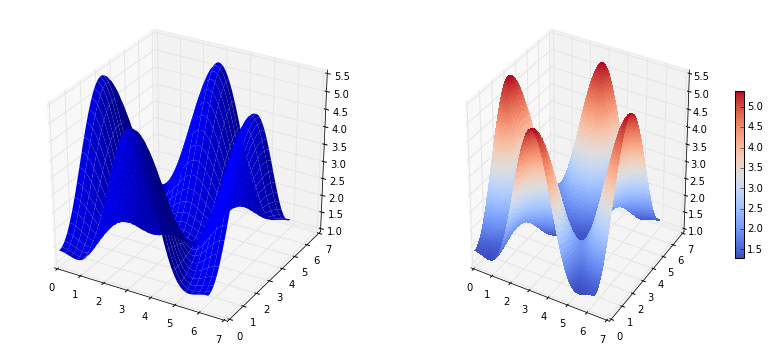

In [1]:
#<help:plot_3D_surface>
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(14,6))

alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p)*np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

# `ax` is a 3D-aware axis instance because of the 
# projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=3, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                    cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

##3D Wireframe
Use `wireframe()` to plot a wireframe surface.

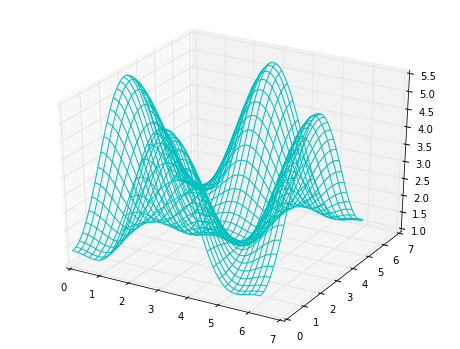

In [2]:
#<help:plot_3D_wireframe>
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D

alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p)*np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3, color='c')

##3D Contour Plot
Add `contourf()` to an axis to have a projection of the 3D graph be colored in the specified axis.

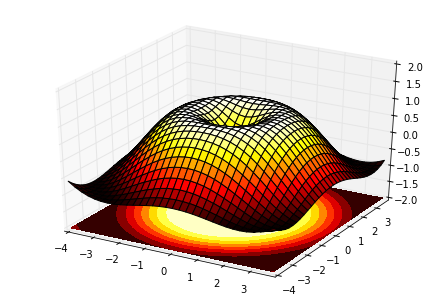

In [3]:
#<help:plot_3D_contour>
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4,4,0.25)
Y = np.arange(-4,4,0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt( X**2 + Y **2)
Z = np.sin(R)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap = plt.cm.hot)
ax.contourf(X, Y, Z , zdir='z', offset= -2, cmap=plt.cm.hot)
ax.set_zlim(-2,2)
plt.show()

That's it!
You can find more examples at 
http://matplotlib.org/examples/index.html
